In [22]:
import sympy as sp
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy.optimize import minimize
import pyPI as pi

In [23]:
# Campo a la salida del primer beam splitter
E_in = pi.polarization_basis_set('P45')

In [24]:
# En ambas mediciones el campo incidente en la muestra se mantiene con circular derecha
alpha_HWP_S, alpha_QWP_S = pi.PSG_calculator(E_in, pi.polarization_basis_set('L'), p = True)
print('Campo electrico incidente en la muestra')
E_is = pi.field_notation(pi.PSG(alpha_HWP_S, alpha_QWP_S) @ E_in, p = True)

HWP: alpha_1 = 0.0000π
QWP: alpha_2 = 0.0000π
Campo electrico incidente en la muestra
0.70711
0.70711
0.5π



In [25]:
# Miremos que pasa si la muestra tiene una birrefringencia de pi/2 sin rotacion
E_s = pi.field_notation(pi.jones_matrix(np.pi/2,np.pi/2)@E_is,p=True)

0.70711
0.70711
1.0π



In [26]:
# El primer interferograma se toma con el campo en el brazo de referencia con una polarizacion horizontal
alpha_HWP_R1, alpha_QWP_R1 = pi.PSG_calculator(E_in, pi.polarization_basis_set('H'), p = True)
print('Campo electrico en el brazo de referencia')
E_r1 = pi.field_notation(pi.PSG(alpha_HWP_R1, alpha_QWP_R1) @ E_in, p = True)

HWP: alpha_1 = 0.1250π
QWP: alpha_2 = 0.0000π
Campo electrico en el brazo de referencia
1.0
0.0
0.5π



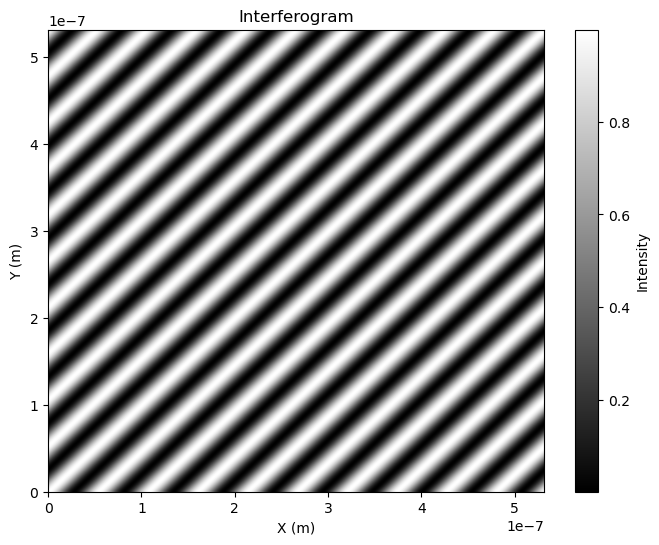

In [27]:
# Hagamos la primera medida
info_1 = pi.numeric_intensity(E_r1, E_s, n=20, plot = True)

In [28]:
# El segundo interferograma se toma con el campo en el brazo de referencia con una polarizacion a 45
alpha_HWP_R2, alpha_QWP_R2 = pi.PSG_calculator(E_in, pi.polarization_basis_set('P45'), p = True)
print('Campo electrico en el brazo de referencia')
E_r2 = pi.field_notation(pi.PSG(alpha_HWP_R2, alpha_QWP_R2) @ E_in, p = True)

HWP: alpha_1 = 0.2500π
QWP: alpha_2 = 0.2500π
Campo electrico en el brazo de referencia
0.70711
0.70711
0.0π



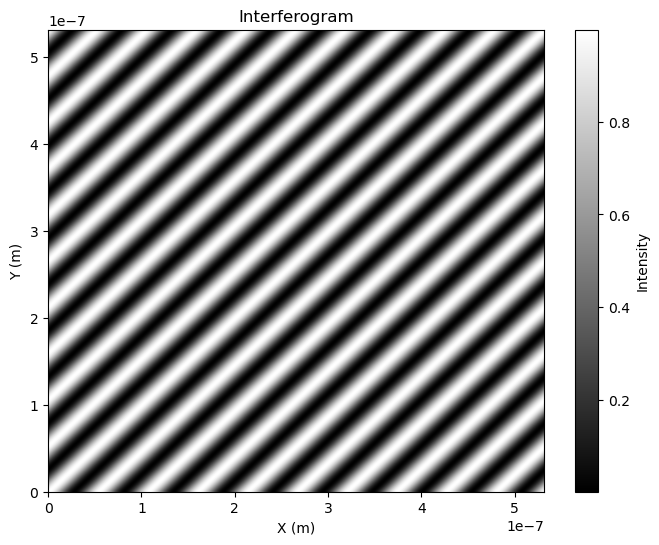

In [29]:
# Hagamos la segunda medida
info_2 = pi.numeric_intensity(E_r2, E_s, n=20, plot = True)

In [30]:
E_s_calculated  = pi.Es_numeric_recosntruction(info_1, info_2)

In [31]:
# Comparar con precisión de 5 decimales
comparison = np.isclose(E_s.real, E_s_calculated.real, atol=1e-6) & \
             np.isclose(E_s.imag, E_s_calculated.imag, atol=1e-6)

# Verificar si todas las entradas son True
np.all(comparison)

True

In [32]:
print('Es:')
print(E_s)
print('Es_calculated:')
print(E_s_calculated)

Es:
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]
Es_calculated:
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]
